# Rossmann Sales Prediction - Exploratory Data Analysis (EDA)

#### Nhiệm vụ chính
1. Phân tích thống kê mô tả (mean, median, variance, skewness, kurtosis).
2. Trực quan hóa dữ liệu:
   - Univariate: phân phối của Sales, Customers, StoreType,...
   - Bivariate: Sales vs Promo, Sales vs StoreType, Sales vs Month,...
   - Multivariate: mối quan hệ giữa nhiều biến.
3. Vẽ **heatmap correlation** để tìm biến tương quan cao với Sales.
4. Rút ra **insight quan trọng** giúp ích cho feature engineering và modeling.

#### Kết quả bàn giao
- Notebook EDA với hình ảnh trực quan.
- Bảng insight chính (những yếu tố ảnh hưởng mạnh đến Sales).


In [39]:
import os, gc, pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.grid'] = True
sns.set_theme(style="whitegrid")

os.makedirs("image", exist_ok=True)

# Importing basic libraries for data processing
import math
from datetime import datetime

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings("ignore")

# Importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



os.makedirs("image", exist_ok=True) → đảm bảo luôn có thư mục lưu .png.

In [40]:

df = pd.read_csv("processed_data/cleaned_data.csv")

df['Date'] = pd.to_datetime(df['Date'])
# store = pd.read_csv("rossmann-store-sales/store.csv")
#df = df.merge(store, on="Store", how="left")

In [41]:
# Considering those rows where stores are open and sales are not zero. 
df = df[(df['Open']==1) & (df['Sales']!=0)]            

# Now since every store in our dataset are opened , we don't need 'Open' column and we will drop this column
df.drop(['Open'],axis=1,inplace=True)

Lọc bỏ các hàng dữ liệu không hữu ích (cửa hàng đóng cửa hoặc không bán được hàng).

Giữ lại dữ liệu “có hoạt động bán hàng thực tế”.

Xóa cột Open vì từ thời điểm này nó không còn thông tin phân biệt nào nữa.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   StoreType                  844338 non-null  object        
 9   Assortment                 844338 non-null  object        
 10  CompetitionDistance        844338 non-null  int64         
 11  CompetitionOpenSinceMonth  844338 non-null  int64       

Dòng này sẽ giúp bạn xem tổng số cột và kiểu dữ liệu.

# Phân tích đơn biến (Univariate Analysis)

## Biểu đồ 1: Phân tích tần suất phân phối của các biến liên tục – Sales, CompetitionDistance, Customers

C:\Users\pc\AppData\Local\Temp\ipykernel_38776\4240838522.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Sales"], color="Green", shade = True)  #kernel density estimate (KDE) plot
C:\Users\pc\AppData\Local\Temp\ipykernel_38776\4240838522.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["CompetitionDistance"], color="Blue", shade = True) #kernel density estimate (KDE) plot
C:\Users\pc\AppData\Local\Temp\ipykernel_38776\4240838522.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Customers"], color="Red", shade = True) #kernel density estimate (KDE) plot


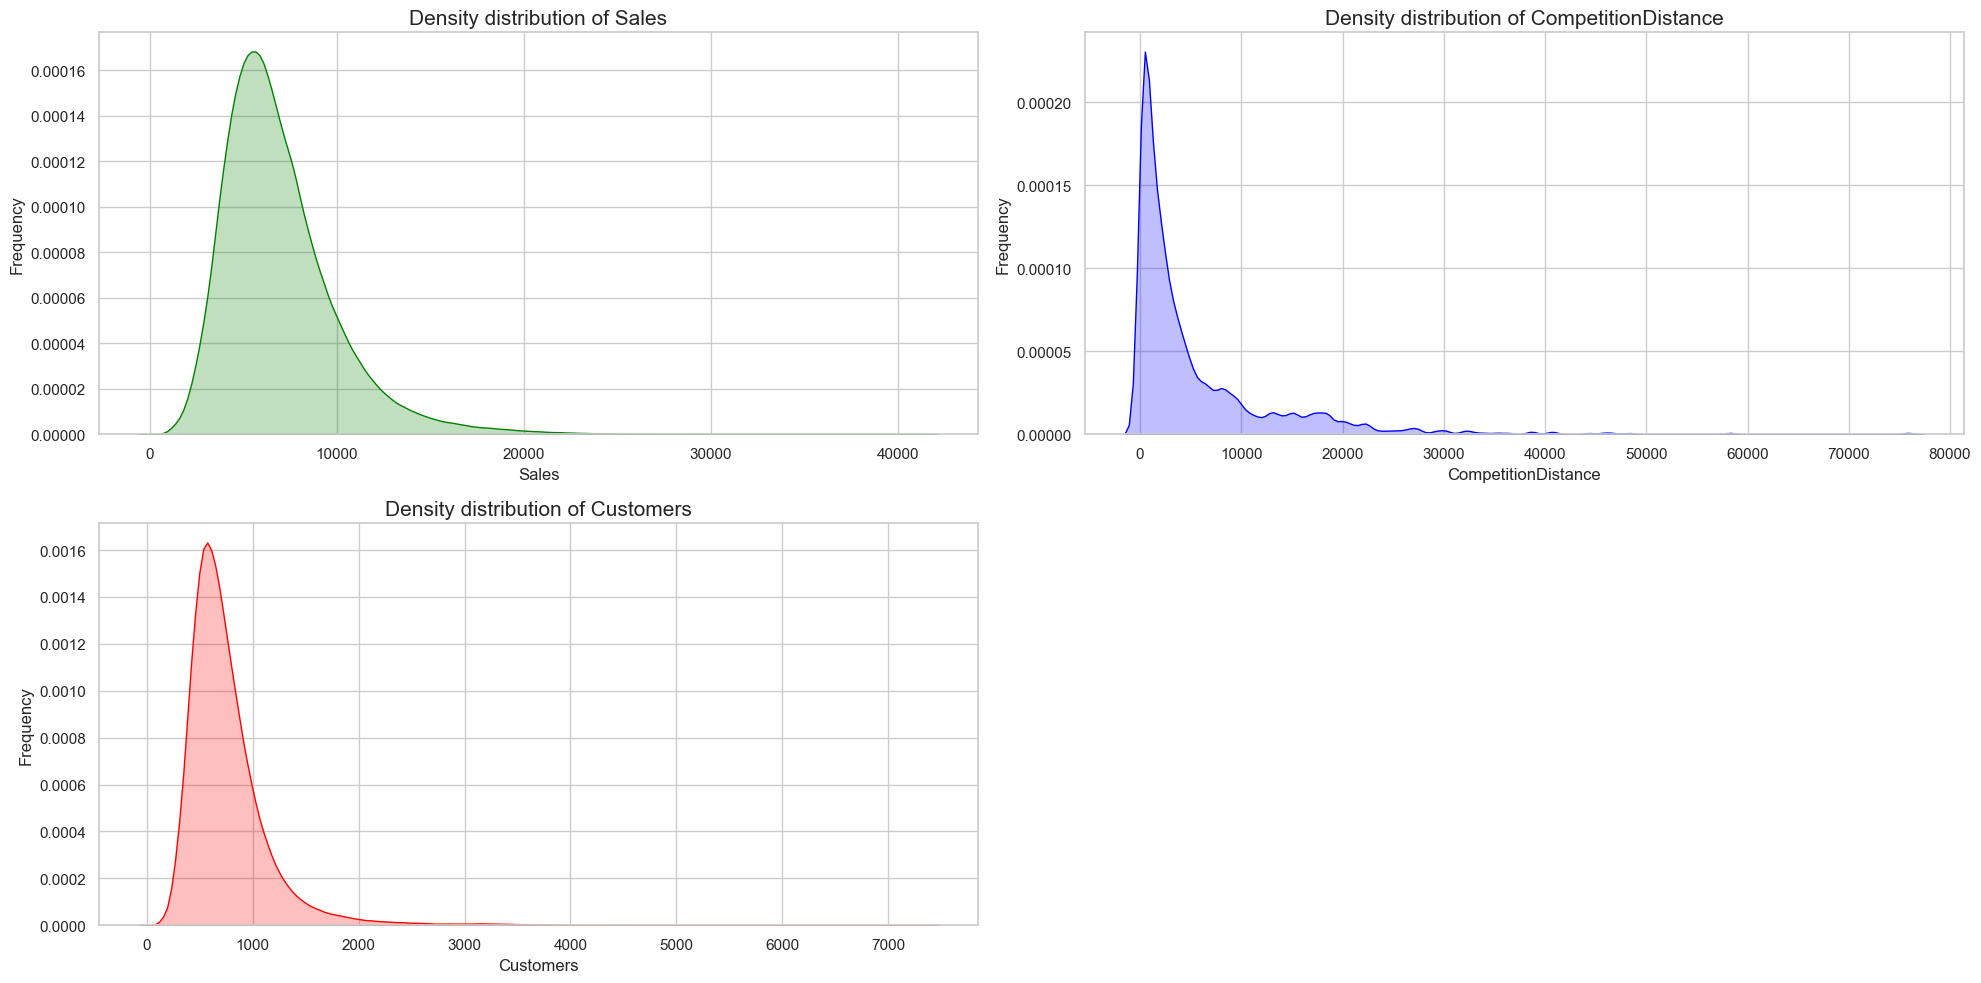

In [5]:
#Checking Frequency distribution for continous features:
plt.figure(figsize=(20,10))

#First plot(Sales vs Frequency)
plt.subplot(2,2,1)
plt.xlabel("Sales")
plt.ylabel("Frequency")
sns.kdeplot(df["Sales"], color="Green", shade = True)  #kernel density estimate (KDE) plot
plt.title('Density distribution of Sales',size = 15)

#Second plot(CompetitionDistance vs Frequency)
plt.subplot(2,2,2)
plt.xlabel("CompetitionDistance")
plt.ylabel("Frequency")
sns.kdeplot(df["CompetitionDistance"], color="Blue", shade = True) #kernel density estimate (KDE) plot
plt.title('Density distribution of CompetitionDistance',size = 15)

#Third plot(Customers vs Frequency)
plt.subplot(2,2,3)
plt.xlabel("Customers")
plt.ylabel("Frequency")
sns.kdeplot(df["Customers"], color="Red", shade = True) #kernel density estimate (KDE) plot
plt.title('Density distribution of Customers',size = 15)
plt.tight_layout()  
plt.savefig("image/eda_univariate_sales_comp_customers.png", dpi=200, bbox_inches="tight")
plt.show()
plt.close()

1.Tại sao chọn loại biểu đồ này?

Chúng tôi chọn biểu đồ này vì nó thể hiện rõ mức độ phân bố của các giá trị liên tục — cho biết các quan sát có tập trung ở một vùng cụ thể hay phân tán trên toàn thang đo, cũng như cho thấy mức độ cao hay thấp của các giá trị như Sales, Customers và CompetitionDistance.

2. Những insight rút ra từ biểu đồ là gì?

Giá trị doanh thu trung bình (Sales) nhỏ hơn 5000, và biểu đồ có dạng lệch phải, cho thấy hầu hết các cửa hàng hoạt động ở khu vực dân cư trung lưu.

Phần lớn các cửa hàng có đối thủ cạnh tranh trong phạm vi dưới 5km, điều này cho thấy các cửa hàng cạnh tranh thường nằm gần nhau.

Số lượng khách hàng trung bình mỗi ngày tại các cửa hàng vào khoảng 700 người.

3️. Những insight này có giúp tạo tác động tích cực đến kinh doanh không?

Có insight nào cho thấy xu hướng tăng trưởng tiêu cực không? Hãy giải thích cụ thể.

Do phần lớn doanh thu ở mức dưới 1000, doanh nghiệp nên mở thêm cửa hàng tại các khu vực cao cấp hoặc khu dân cư có thu nhập cao để mở rộng thị phần và tăng doanh số.

Biểu đồ tần suất của Sales, Customers và CompetitionDistance cho thấy nhiều cửa hàng cạnh tranh tập trung dày đặc trong cùng khu vực, vì vậy doanh nghiệp cần xây dựng chiến lược khác biệt để duy trì vị thế trong thị trường cạnh tranh cao.

## Biểu đồ 2: Kiểm tra phân bố tần suất của các biến liên tục – SchoolHoliday, Promo, Promo2.

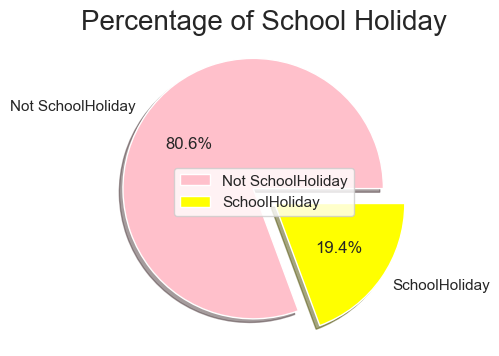

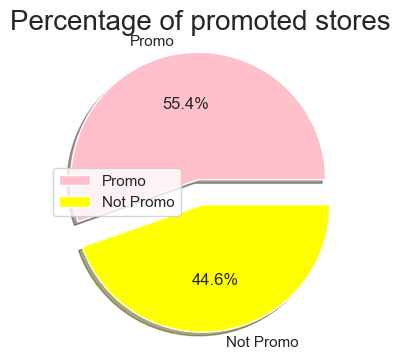

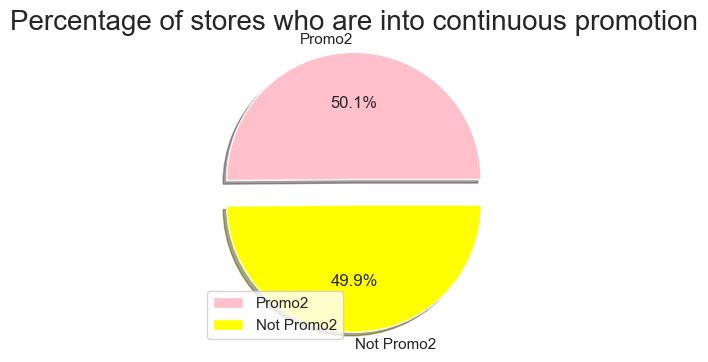

In [6]:
#Lets check distribution for Some discrete features(SchoolHoliday,Promo,Promo2):
labels = 'Not SchoolHoliday' , 'SchoolHoliday'
sizes = df.SchoolHoliday.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of School Holiday",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.savefig("image/PercentageofSchoolHoliday_pie.png", dpi=200, bbox_inches="tight")
plt.show()

labels = 'Promo' , 'Not Promo'
sizes = df.Promo.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of promoted stores",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.savefig("image/Percentageofpromotedtores_pie.png", dpi=200, bbox_inches="tight")
plt.show()

labels = 'Promo2' , 'Not Promo2'
sizes = df.Promo2.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of stores who are into continuous promotion",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.savefig("image/Percentageofstores", dpi=200, bbox_inches="tight")
plt.show()
 

1.. Tại sao bạn chọn biểu đồ này?
Chúng tôi chọn biểu đồ tròn (pie chart) vì nó thể hiện rõ tỷ lệ đóng góp của từng phần dữ liệu trong tổng thể. Kích thước của mỗi phần cung tròn tỉ lệ thuận với mức độ đóng góp của phần dữ liệu đó.

2. Những insight (thông tin, nhận định) rút ra từ biểu đồ là gì?

Từ biểu đồ tròn thứ nhất, ta có thể thấy rằng khoảng 20% thời gian thị trường rơi vào kỳ nghỉ học (School Holidays).

Từ biểu đồ thứ hai, ta nhận thấy rằng 44.6% cửa hàng đang chạy khuyến mãi (Promotion), trong khi 55.4% cửa hàng không tham gia khuyến mãi. Nguyên nhân có thể do một số cửa hàng không đủ ngân sách hoặc chưa thấy cần thiết phải triển khai chương trình khuyến mãi.

Từ biểu đồ thứ ba, ta có thể rút ra rằng tỷ lệ cửa hàng đang được khuyến mãi và không được khuyến mãi gần như tương đương nhau.

3. Những insight này có giúp tạo ra tác động tích cực cho doanh nghiệp không?
Có insight nào dẫn đến tăng trưởng âm không? Hãy giải thích cụ thể.

Từ các biểu đồ trên, chúng tôi nhận thấy rằng tỷ lệ cửa hàng được khuyến mãi cao hơn cửa hàng không khuyến mãi, và doanh số bán hàng có mối tương quan dương với hoạt động khuyến mãi — nghĩa là khi cửa hàng tham gia khuyến mãi, doanh số có xu hướng tăng.

 Vì vậy, doanh nghiệp nên đẩy mạnh các chương trình khuyến mãi để gia tăng doanh thu.



## Biểu đồ 3: Kiểm tra phân bố tần suất của các biến StoreType, Assortment, StateHoliday và PromoIntervals.

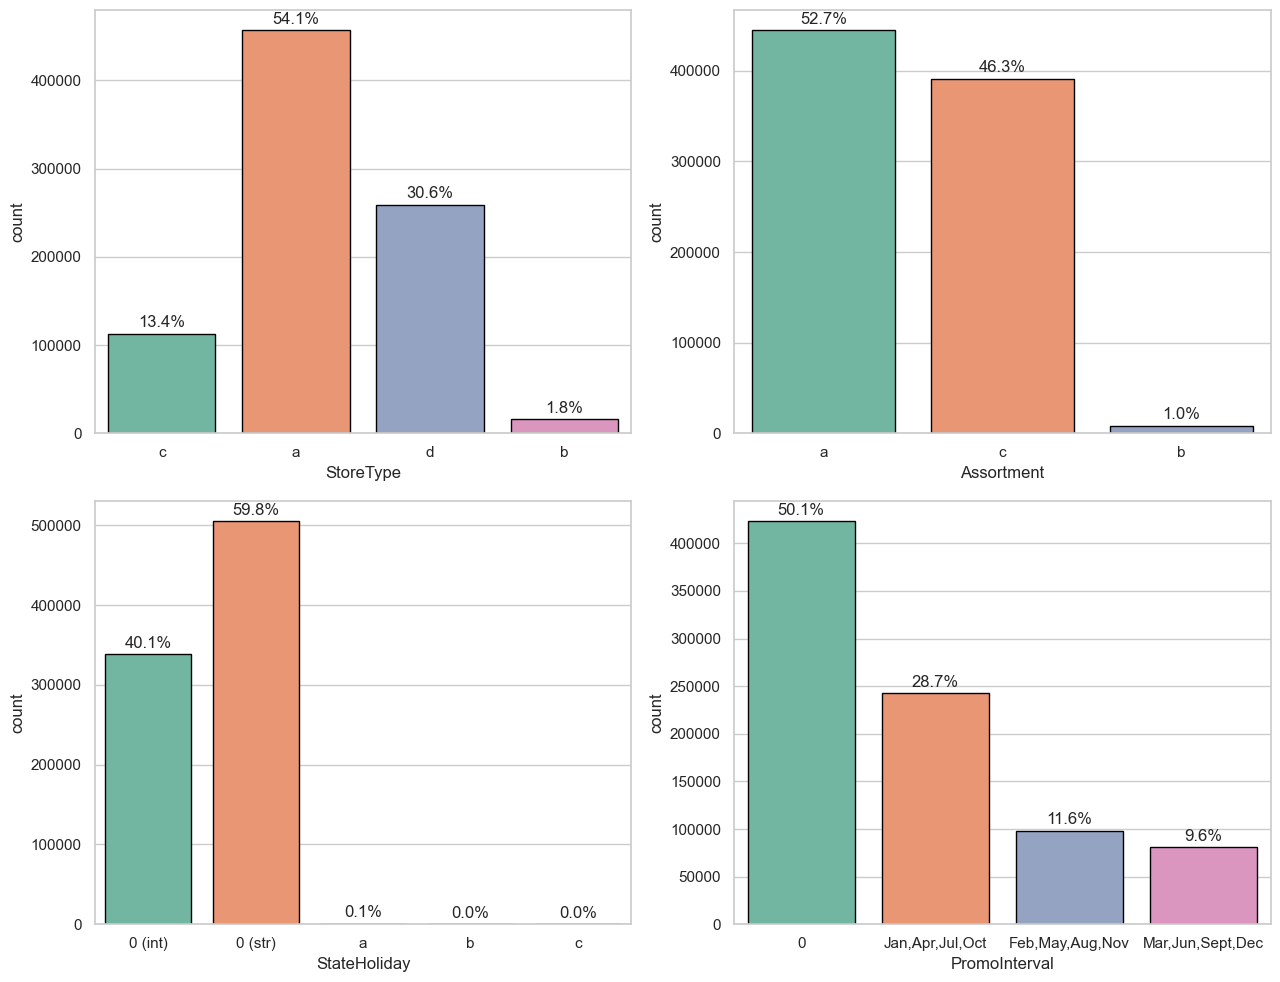

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Tạo cột StateHoliday tách 0 theo kiểu dữ liệu ---
def split_zero(v):
    if pd.isna(v):
        return np.nan
    if isinstance(v, int) and v == 0:
        return "0 (int)"
    if isinstance(v, str) and v.strip() == "0":
        return "0 (str)"
    return v

df_plot = df.copy()
df_plot["StateHoliday_plot"] = df_plot["StateHoliday"].apply(split_zero)

# Thứ tự hiển thị (chỉ giữ các nhãn thực sự có trong dữ liệu)
order_stateholiday = [x for x in ["0 (int)", "0 (str)", "a", "b", "c"]
                      if x in df_plot["StateHoliday_plot"].unique()]

N = len(df_plot)  # mẫu số cho phần trăm

# --- 2) Vẽ 4 ô giống mẫu ---
plt.figure(figsize=(13,10))

# (1) StoreType
plt.subplot(2,2,1)
ax = sns.countplot(x="StoreType", data=df_plot, palette="Set2", edgecolor="black")
for p in ax.patches:
    ax.annotate(f"{100*p.get_height()/N:.1f}%",
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="center", size=12, xytext=(0,8),
                textcoords="offset points")
ax.set_xlabel("StoreType"); ax.set_ylabel("count")

# (2) Assortment
plt.subplot(2,2,2)
ax = sns.countplot(x="Assortment", data=df_plot, palette="Set2", edgecolor="black")
for p in ax.patches:
    ax.annotate(f"{100*p.get_height()/N:.1f}%",
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="center", size=12, xytext=(0,8),
                textcoords="offset points")
ax.set_xlabel("Assortment"); ax.set_ylabel("count")

# (3) StateHoliday (tách 0 int / 0 str)
plt.subplot(2,2,3)
ax = sns.countplot(x="StateHoliday_plot", data=df_plot,
                   order=order_stateholiday, palette="Set2", edgecolor="black")
for p in ax.patches:
    ax.annotate(f"{100*p.get_height()/N:.1f}%",
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="center", size=12, xytext=(0,8),
                textcoords="offset points")
ax.set_xlabel("StateHoliday"); ax.set_ylabel("count")

# (4) PromoInterval
plt.subplot(2,2,4)
ax = sns.countplot(x="PromoInterval", data=df_plot, palette="Set2", edgecolor="black")
for p in ax.patches:
    ax.annotate(f"{100*p.get_height()/N:.1f}%",
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="center", size=12, xytext=(0,8),
                textcoords="offset points")
ax.set_xlabel("PromoInterval"); ax.set_ylabel("count")

plt.tight_layout()
plt.show()


Chưa làm được State Holiday bị sai

## Biểu đồ 4: Kiểm tra phân bố tần suất của biến Promo2.

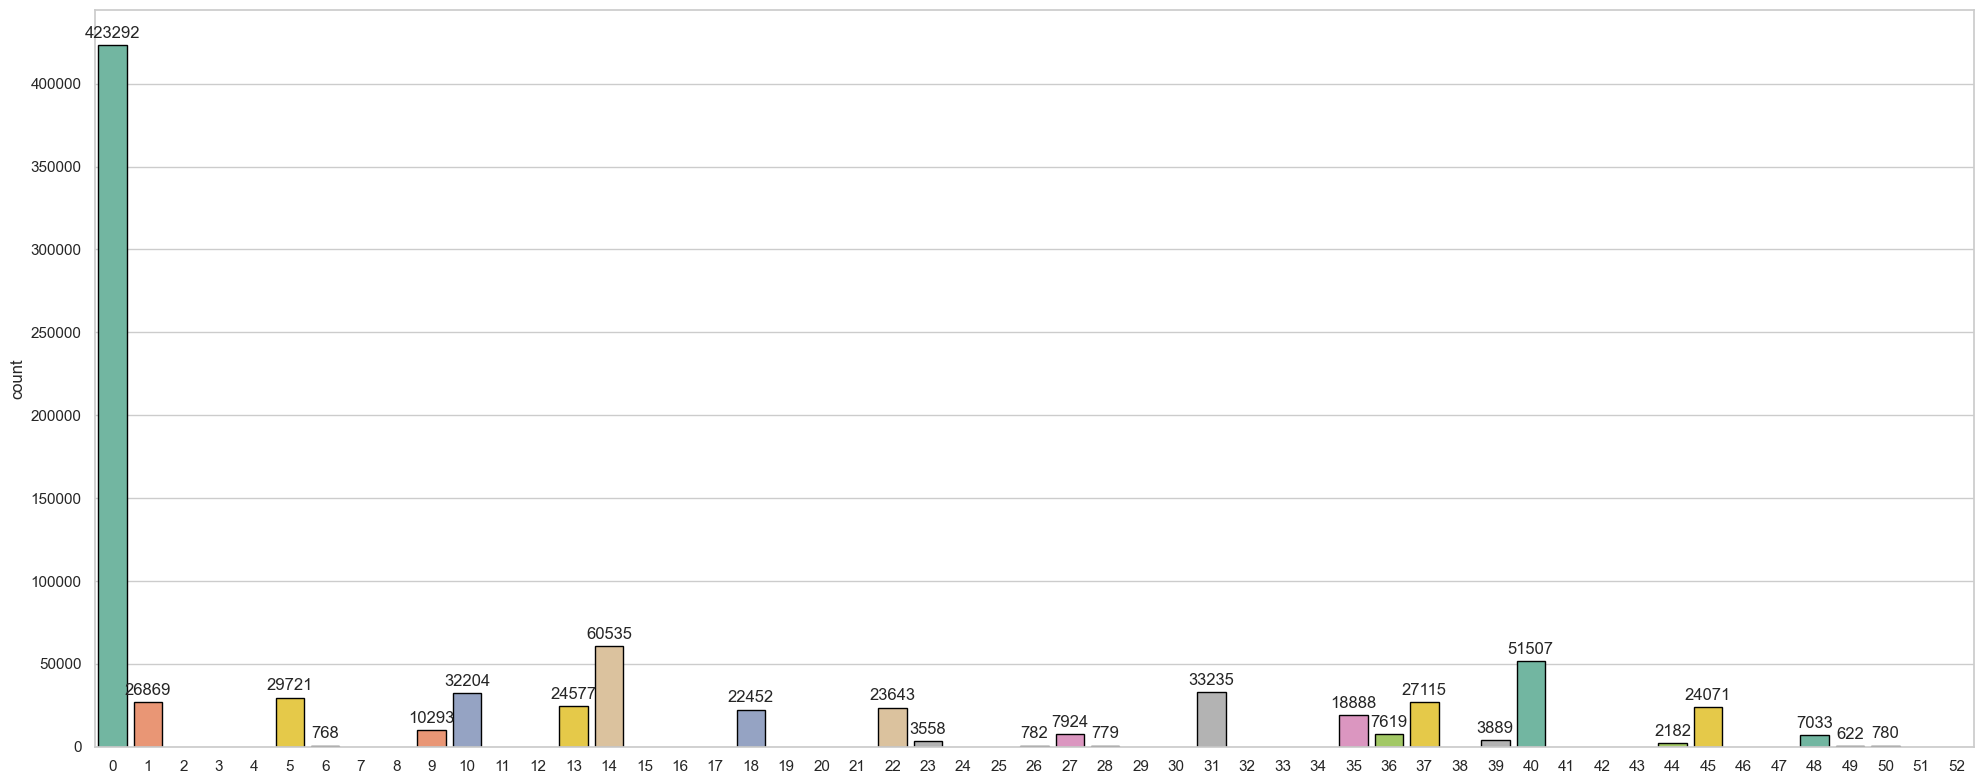

In [28]:
# Promo 2 since weeks  (nhanh, ổn định)
plt.figure(figsize=(20,8))

# ép kiểu Category để đảm bảo chỉ có 0..52 tuần (tránh sinh hàng nghìn cột nếu dữ liệu lẫn giá trị lạ)
cats = pd.Categorical(df['Promo2SinceWeek'], categories=range(0,53), ordered=True)

ax = sns.countplot(x=cats, palette='Set2', edgecolor='black')  # dùng x= thay vì truyền Series vị trí

# gắn nhãn số
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', xytext=(0,3), textcoords='offset points')

plt.tight_layout()
plt.savefig("image/chart_promoweek_count.png", dpi=200, bbox_inches="tight")
plt.show()


## Phân tích hai biến (Bivariate Analysis)
 ### Biểu đồ 1: Doanh số (Sales) so với Ngày trong tuần (DayOfWeek).

In [40]:
sns.set_palette("Set2")  


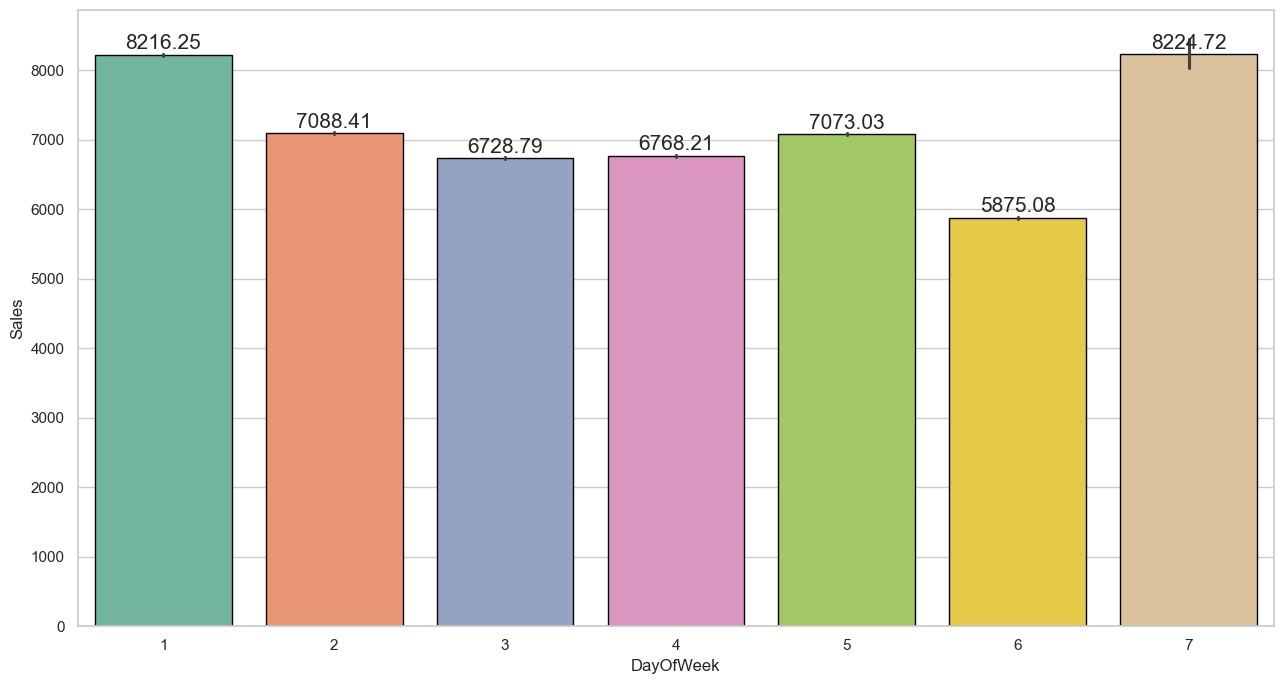

In [75]:
# Sales vs DayOfWeek
plt.figure(figsize=(13,7))
plots = sns.barplot(x=df['DayOfWeek'],
                    y=df['Sales'],
                    edgecolor='black',
                    palette='Set2')   # 🎨 thêm dòng này để mỗi cột một màu

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()),
                   ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.tight_layout()
plt.savefig("image/chart5_sales_vs_dayofweek.png", dpi=200, bbox_inches="tight")
plt.show()


1.. Tại sao bạn chọn biểu đồ này?
Chúng tôi sử dụng biểu đồ cột (bar plot) vì đây là công cụ hữu ích để trực quan hóa và hiểu dữ liệu phân loại (categorical data), đồng thời là một cách hiệu quả để truyền tải thông tin đến nhiều đối tượng người xem.

2. Những insight (nhận định) rút ra từ biểu đồ là gì?

Ngày 1 và Ngày 7 có doanh số cao nhất, cho thấy đây có thể là các ngày cuối tuần, khi lượng khách hàng đến cửa hàng tăng mạnh.

Từ Ngày 2 đến Ngày 6, doanh số ở mức trung bình đến thấp, điều này cho thấy đây có thể là các ngày trong tuần – khi lưu lượng khách hàng giảm do bận rộn với công việc.

3. Những insight này có giúp tạo ra tác động tích cực cho doanh nghiệp không?
Có insight nào dẫn đến tăng trưởng âm không? Hãy giải thích cụ thể.

Vì Ngày 1 và Ngày 7 có doanh số cao, doanh nghiệp có thể bố trí thêm nhân viên và đội ngũ giao hàng trong những ngày này để tăng hiệu quả phục vụ và tối đa hóa doanh thu.

Do chỉ có 2 ngày trong tuần đạt doanh số cao, cửa hàng có thể tập trung khai thác thêm 5 ngày còn lại bằng cách triển khai các chương trình ưu đãi hấp dẫn để thu hút khách hàng và cải thiện doanh số trong ngày thường.

## Biểu đồ 2: Sales vs Year


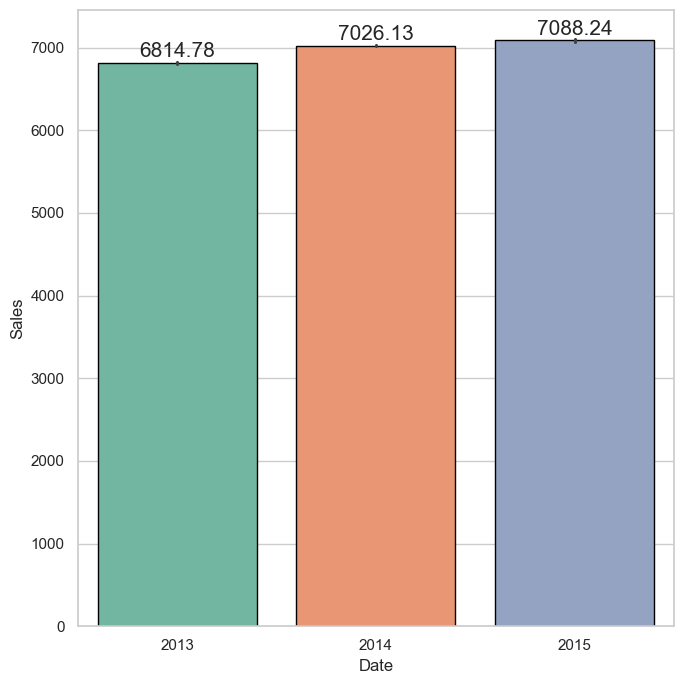

In [74]:
# Sales vs Year
plt.figure(figsize=(7,7))
plots = sns.barplot(x=df["Date"].dt.year,
                    y=df['Sales'],
                    edgecolor='black',
                    palette='Set2')   # 🎨 Thêm palette để có nhiều màu cho từng năm

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()),
                   ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.tight_layout()
plt.savefig("image/chart2_sales_vs_year.png", dpi=200, bbox_inches="tight")
plt.show()


1. Tại sao bạn chọn biểu đồ này?
Chúng tôi sử dụng biểu đồ này để trực quan hóa phân bố doanh số theo các năm 2013, 2014 và 2015.
Biểu đồ đếm (count plot) giúp chúng tôi hiểu được cách các giá trị của biến doanh số được phân bố trong tập dữ liệu.

2. Những insight (nhận định) rút ra từ biểu đồ là gì?
Đối với bất kỳ doanh nghiệp nào, mức tăng trưởng doanh số theo năm (year-on-year sales growth) là chỉ số quan trọng để đánh giá sự phát triển của cửa hàng.
Từ biểu đồ, ta có thể thấy rằng doanh số tuy có tăng qua từng năm, nhưng mức tăng trưởng chưa đạt đến 10%, cho thấy doanh nghiệp cần nỗ lực hơn nữa để cải thiện doanh thu hằng năm.

3. Những insight này có giúp tạo ra tác động tích cực cho doanh nghiệp không?
Có insight nào dẫn đến tăng trưởng âm không? Hãy giải thích cụ thể.

Có. Những insight từ biểu đồ này rất quan trọng đối với chủ cửa hàng.
Vì tốc độ tăng trưởng hiện tại chưa thật sự ấn tượng, doanh nghiệp cần tập trung thu hút thêm khách hàng mới và cải thiện quy trình vận hành để đẩy mạnh doanh số trong các năm tiếp theo.

## Biểu đồ 3: Sales vs Month


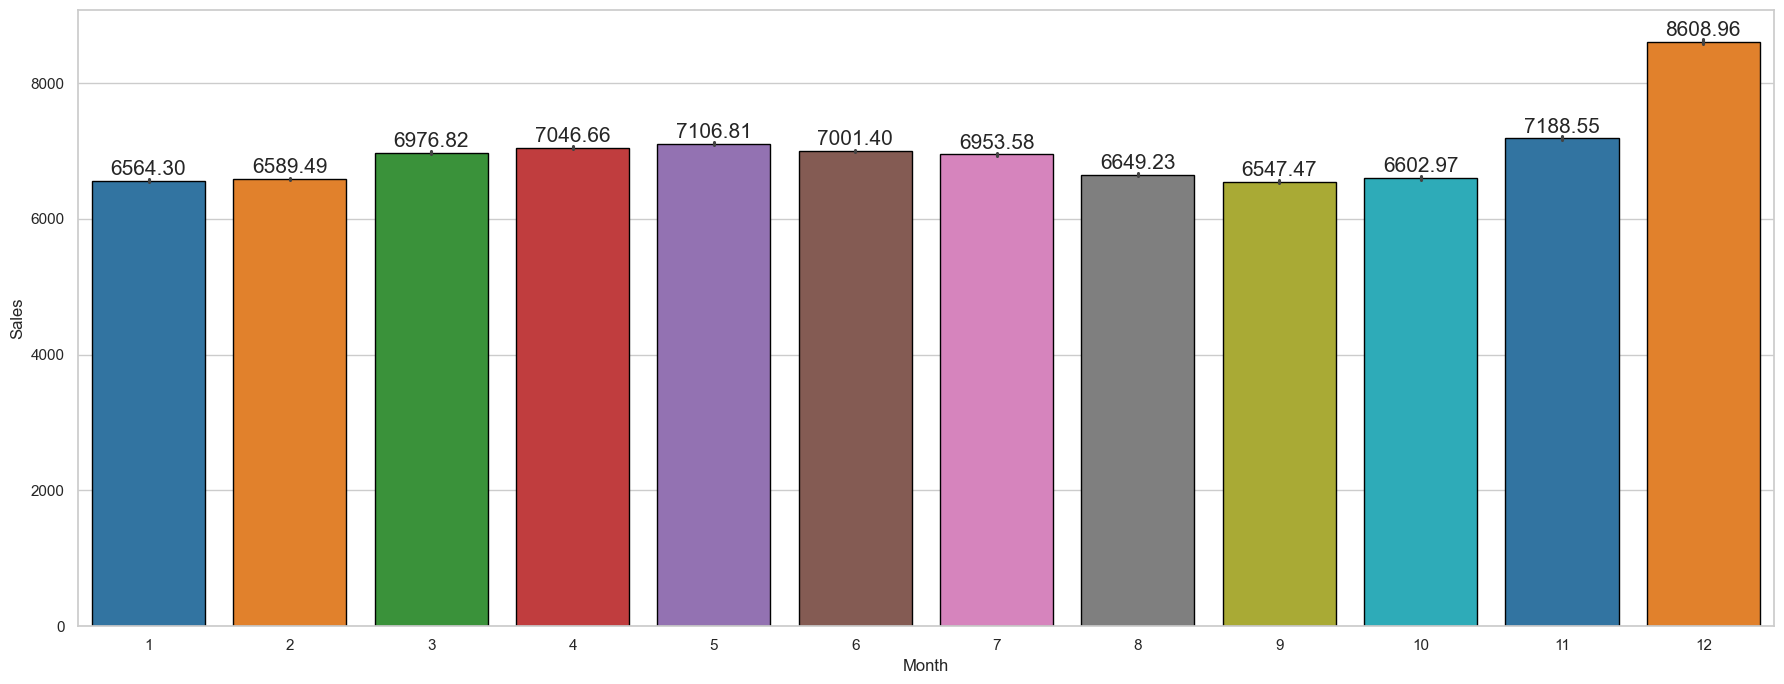

In [73]:
# Month vs Sales
plt.figure(figsize=(18,7))
plots = sns.barplot(x=df['Date'].dt.month,
                    y=df['Sales'],
                    edgecolor='black',
                    palette='tab10')   # 🎨 Thêm dòng này để có 12 màu khác nhau

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), 
                   ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Month")
plt.tight_layout()
plt.savefig("image/chart3_sales_vs_month.png", dpi=200, bbox_inches="tight")
plt.show()


1. Tại sao bạn chọn biểu đồ này?
Chúng tôi sử dụng biểu đồ này để xác định các mẫu hoặc xu hướng trong dữ liệu, chẳng hạn như thời điểm hoạt động hoặc doanh số đạt đỉnh trong một tháng cụ thể trong năm.

2. Những insight (nhận định) rút ra từ biểu đồ là gì?
Biểu đồ đếm (countplot) cho thấy rằng tháng 12 – mùa lễ hội – có doanh số cao nhất trong năm.
Ngoài ra, tháng 11 cũng ghi nhận doanh số cao hơn một chút so với các tháng khác, có thể là do ảnh hưởng của chương trình khuyến mãi “Black Friday”, vốn rất phổ biến trên toàn cầu.
Vì Rossmann là chuỗi cửa hàng chuyên kinh doanh sản phẩm chăm sóc sức khỏe và sắc đẹp, ta có thể suy đoán rằng doanh số tăng mạnh trong tháng 11 và 12 xuất phát từ nhu cầu mua sắm, làm đẹp và chuẩn bị cho dịp lễ hội của khách hàng.

3. Những insight này có giúp tạo ra tác động tích cực cho doanh nghiệp không?
Có insight nào dẫn đến tăng trưởng âm không? Hãy giải thích cụ thể.

Có, chắc chắn là có.
Những insight này mang lại tác động tích cực cho doanh nghiệp, vì chủ cửa hàng có thể chuẩn bị thêm hàng hóa để đáp ứng nhu cầu tăng cao trong giai đoạn cuối năm.
Bên cạnh đó, họ có thể gia tăng doanh thu bằng cách mở cửa hàng vào cuối tuần hoặc trong các ngày lễ, do khách hàng có xu hướng mua sắm nhiều hơn trong thời gian này

## Biểu đồ 4 : Sales vs Customer


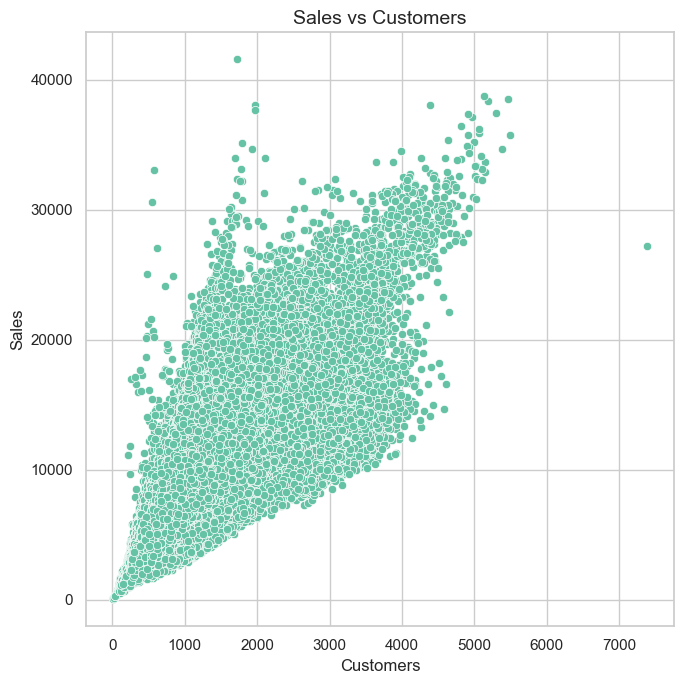

In [51]:
# Sales vs Customers
plt.figure(figsize=(7,7))
sns.scatterplot(x="Customers", y="Sales", data=df)
plt.title("Sales vs Customers", fontsize=14)
plt.xlabel("Customers")
plt.ylabel("Sales")
plt.tight_layout()

plt.savefig("image/chart4_sales_vs_customer.png", dpi=200, bbox_inches="tight")
plt.show()


1. Tại sao bạn chọn biểu đồ này?
Chúng tôi chọn biểu đồ phân tán (scatter plot) vì muốn thể hiện mối quan hệ giữa số lượng khách hàng ghé thăm cửa hàng và tổng doanh số bán hàng.
Biểu đồ phân tán rất hữu ích để phát hiện các giá trị ngoại lai (outliers) trong dữ liệu, xác định mức độ tương quan giữa hai biến, và kiểm tra xem dữ liệu có xu hướng tuyến tính hay không.

2. Những insight (nhận định) rút ra từ biểu đồ là gì?
Biểu đồ phân tán trên cho thấy mối tương quan dương giữa “Sales” (Doanh số) và “Customers” (Số lượng khách hàng).
Khi số lượng khách hàng tăng, doanh số cũng có xu hướng tăng theo.
Từ xu hướng này, ta có thể thấy rằng dữ liệu thể hiện mối quan hệ tuyến tính giữa hai biến — khách hàng và doanh số.

3. Những insight này có giúp tạo ra tác động tích cực cho doanh nghiệp không?
Có insight nào dẫn đến tăng trưởng âm không? Hãy giải thích cụ thể.

   Có. Vì số lượng khách hàng và doanh số có mối quan hệ tỷ lệ thuận và tương quan cao, doanh nghiệp có thể tận dụng insight này để xây dựng các chiến lược marketing, chiến dịch quảng cáo hoặc khuyến mãi nhằm thu hút thêm khách hàng, từ đó tăng trưởng doanh số bán hàng một cách đáng kể.

## Biểu đồ 5 : Sales vs Promo

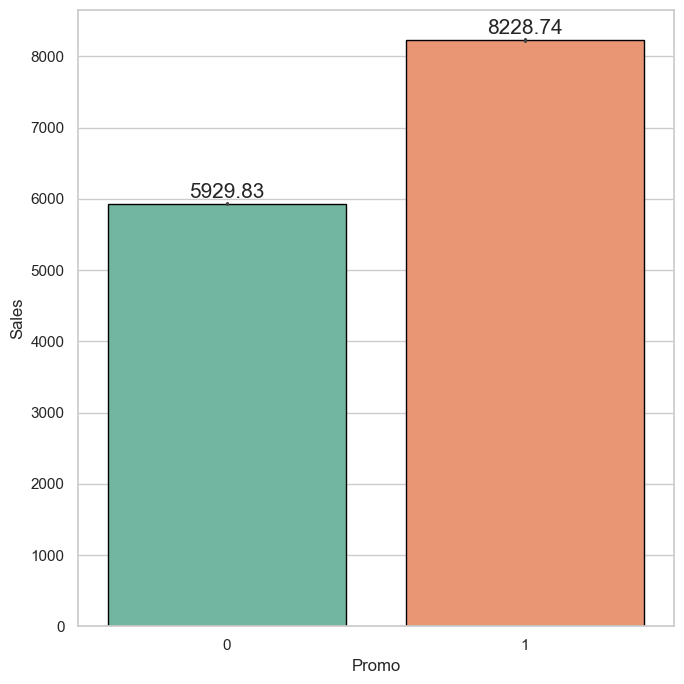

In [72]:
# Sales vs Promo
plt.figure(figsize=(7,7))
plots = sns.barplot(x=df['Promo'],
                    y=df['Sales'],
                    edgecolor='black',
                    palette='Set2')   # 👈 Thêm dòng này để có nhiều màu

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), 
                   ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plt.tight_layout()
plt.savefig("image/chart5_sales_vs_promo.png", dpi=200, bbox_inches="tight")
plt.show()


1. Tại sao bạn chọn biểu đồ này?
Chúng tôi chọn biểu đồ này để xác định số lượng doanh số bán hàng được thực hiện tại các cửa hàng có chạy chương trình khuyến mãi và không chạy khuyến mãi.
Chúng tôi sử dụng biểu đồ cột (bar plot) vì đây là công cụ hữu ích giúp trực quan hóa và hiểu dữ liệu phân loại (categorical data), đồng thời truyền tải thông tin một cách hiệu quả đến nhiều đối tượng người xem.

2. Những insight (nhận định) rút ra từ biểu đồ là gì?
Từ biểu đồ trên, ta có thể thấy hiệu quả rõ rệt của chương trình khuyến mãi trong việc thúc đẩy doanh số bán hàng.
Có thể kết luận rằng khi cửa hàng triển khai chương trình khuyến mãi, doanh số tăng lên đáng kể, cho thấy mối tương quan dương giữa biến “Promo” (khuyến mãi) và “Sales” (doanh số).

3. Những insight này có giúp tạo ra tác động tích cực cho doanh nghiệp không?
Có insight nào dẫn đến tăng trưởng âm không? Hãy giải thích cụ thể.

    Có.
    Từ insight trên, có thể khẳng định rằng chủ cửa hàng nên tăng cường triển khai các chương trình khuyến mãi để duy trì khả năng cạnh tranh trên thị trường, từ đó gia tăng doanh số bán hàng.

In [ ]:
import pandas as pd


path_clean = "processed_data/cleaned_data.csv"
df_rossmann = pd.read_csv(path_clean)

print("Rows:", len(df_rossmann))
print("Dtype of StateHoliday:", df_rossmann["StateHoliday"].dtype)
print("Unique:", df_rossmann["StateHoliday"].unique()[:10])  
print(df_rossmann["StateHoliday"].value_counts(dropna=False))


Rows: 1017209
Dtype of StateHoliday: object
Unique: [0 '0' 'a' 'b' 'c']
StateHoliday
0    592943
0    393216
a     20260
b      6690
c      4100
Name: count, dtype: int64


In [46]:
df_rossmann["StateHoliday"].unique()

array([0, '0', 'a', 'b', 'c'], dtype=object)

In [47]:
df_rossmann["StateHoliday"].value_counts()

StateHoliday
0    592943
0    393216
a     20260
b      6690
c      4100
Name: count, dtype: int64

## Biểu đồ 6 : Sales vs StateHoliday

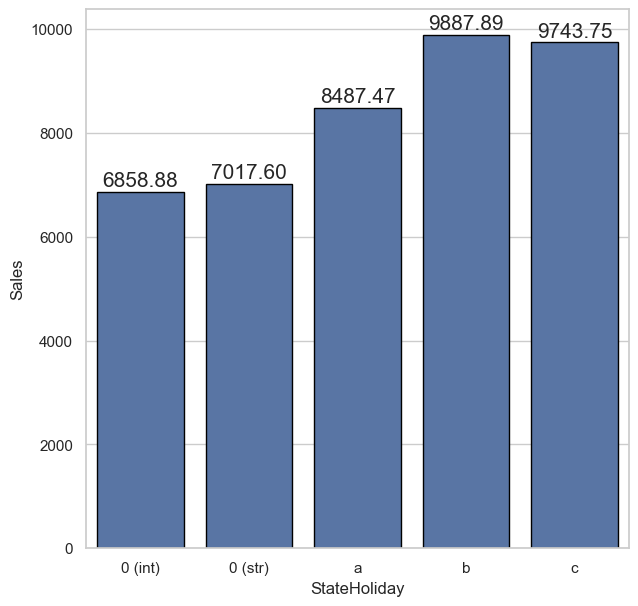

In [49]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



def _split_zero(v):
    if pd.isna(v):
        return np.nan
    if isinstance(v, int) and v == 0:
        return "0 (int)"
    if isinstance(v, str) and v.strip() == "0":
        return "0 (str)"
    return v

df = df.copy()
df["StateHoliday"] = df["StateHoliday"].apply(_split_zero)


order = ["0 (int)", "0 (str)", "a", "b", "c"]
order = [x for x in order if x in df["StateHoliday"].unique()]


plt.figure(figsize=(7,7))
ax = sns.barplot(x="StateHoliday", y="Sales", data=df, order=order, edgecolor="black", ci=None)


for bar in ax.patches:
    h = bar.get_height()
    ax.annotate(f"{h:.2f}",
                (bar.get_x() + bar.get_width()/2, h),
                ha='center', va='center', size=15,
                xytext=(0, 8), textcoords='offset points')

ax.set_xlabel("StateHoliday")
ax.set_ylabel("Sales")
plt.show()


Chưa làm được, vẫn bị sai

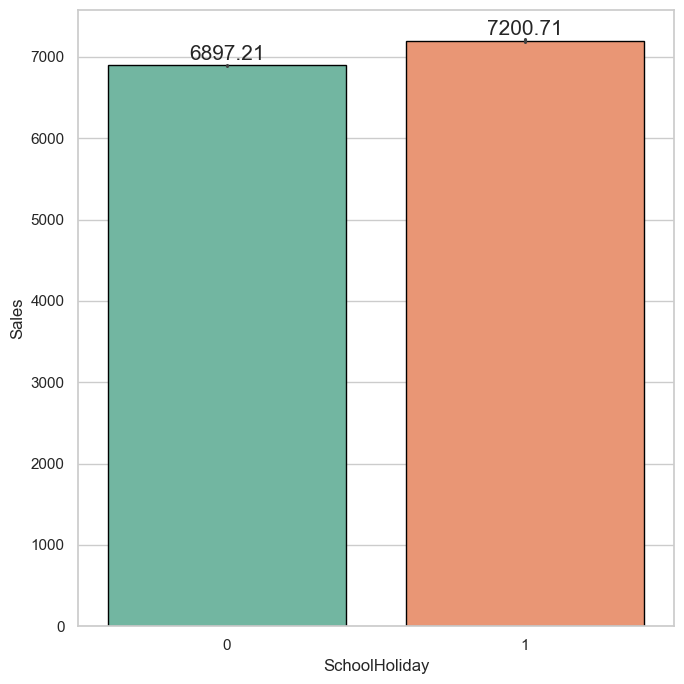

In [70]:
# Sales vs SchoolHoliday

plt.figure(figsize=(7,7))

plots = sns.barplot(x=df['SchoolHoliday'],
                    y=df['Sales'],
                    edgecolor='black',
                    palette='Set2')   # 👈 thêm dòng này thôi!

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    
    plt.tight_layout()

plt.savefig("image/chart4_sales_vs_schoolHoliday.png", dpi=200, bbox_inches="tight")
plt.show()


1. Tại sao bạn chọn biểu đồ này?
Chúng tôi chọn biểu đồ này để xác định số lượng doanh số bán hàng được thực hiện tại các cửa hàng trong những ngày có kỳ nghỉ học (school holiday) và những ngày không có kỳ nghỉ học.

2. Những insight (nhận định) rút ra từ biểu đồ là gì?
Từ biểu đồ, ta có thể thấy rằng sự chênh lệch doanh số giữa ngày có nghỉ học và ngày không nghỉ học là không đáng kể, tuy nhiên doanh số trong kỳ nghỉ học có phần cao hơn.
Điều này có thể do các kỳ nghỉ học thường gắn liền với việc các gia đình đi du lịch hoặc cha mẹ xin nghỉ phép để dành thời gian cho con cái, dẫn đến mức chi tiêu của người tiêu dùng tăng lên trong giai đoạn này.

3. Những insight này có giúp tạo ra tác động tích cực cho doanh nghiệp không?
Có insight nào dẫn đến tăng trưởng âm không? Hãy giải thích cụ thể.

Dựa trên biểu đồ, việc có hay không có kỳ nghỉ học không tạo ra sự khác biệt lớn về doanh số.
Tuy nhiên, doanh nghiệp vẫn có thể tận dụng các kỳ nghỉ học để triển khai thêm các chương trình khuyến mãi, nhằm thu hút nhiều khách hàng hơn và tối ưu hóa doanh thu trong thời gian này.

## Biểu đồ 8 : Sales vs ShortType

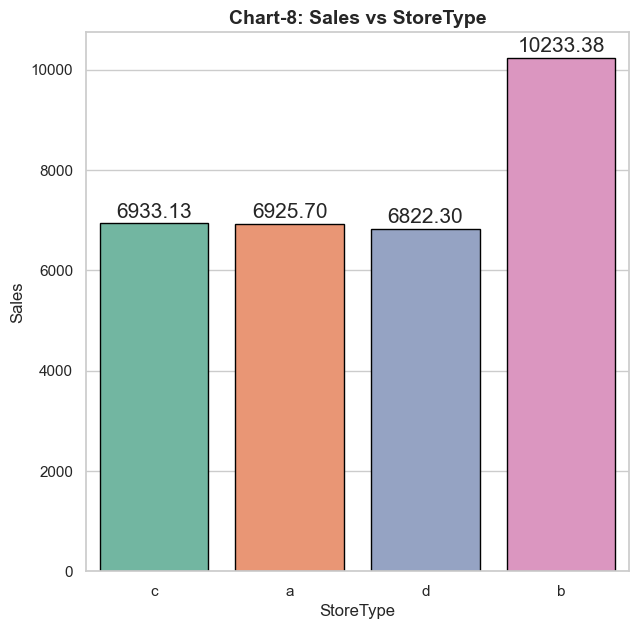

In [ ]:
# Chart-8: Sales vs StoreType

# Import thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ
plt.figure(figsize=(7,7))
plots = sns.barplot(x=df['StoreType'], 
                    y=df['Sales'], 
                    edgecolor='black',
                    palette='Set2',   
                    ci=None)

# Hiển thị giá trị trên từng cột
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()),
                   ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

# Thêm nhãn trục và tiêu đề
plt.xlabel("StoreType", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.title("Chart-8: Sales vs StoreType", fontsize=14, fontweight='bold')

# Hiển thị biểu đồ
plt.show()


1. Tại sao bạn chọn biểu đồ này?
Chúng tôi chọn biểu đồ này để xác định loại cửa hàng nào có khả năng tạo ra lợi nhuận cao nhất.

2. Những insight (nhận định) rút ra từ biểu đồ là gì?
Doanh số của loại cửa hàng B là cao nhất.
Điều này có thể được lý giải bởi một số nguyên nhân sau:

Cửa hàng loại B có thể được đặt ở khu vực đông dân cư hoặc có mức sống cao, giúp tăng lượng khách hàng tiềm năng.

Bố cục và cách trưng bày sản phẩm của cửa hàng loại B có thể được thiết kế hợp lý hơn, tạo trải nghiệm mua sắm hấp dẫn và thuận tiện, giúp khách hàng dễ tìm kiếm sản phẩm hơn, từ đó tăng doanh số.

Trước đó, trong biểu đồ đơn biến (univariate) về loại cửa hàng, chúng tôi đã nhận thấy rằng các cửa hàng loại A, C, D chiếm số lượng lớn hơn.
Tuy nhiên, kết quả doanh số lại cho thấy các cửa hàng loại B – dù ít hơn – vẫn mang lại lợi nhuận cao hơn đáng kể.

Điều này có thể do các cửa hàng loại B kinh doanh những mặt hàng có giá trị cao hoặc mang tính cao cấp, sang trọng.

3. Những insight này có giúp tạo ra tác động tích cực cho doanh nghiệp không?
Có insight nào dẫn đến tăng trưởng âm không? Hãy giải thích cụ thể.

Có.
Vì các cửa hàng loại A, C và D có doanh số thấp hơn, họ có thể học hỏi chiến lược kinh doanh và hoạt động marketing của cửa hàng loại B để nâng cao doanh thu.

Bên cạnh đó, công ty nên mở rộng thêm các cửa hàng loại B để tăng lợi nhuận tổng thể và mở rộng thị phần.

## Biểu đồ 9: Sales vs Assortment

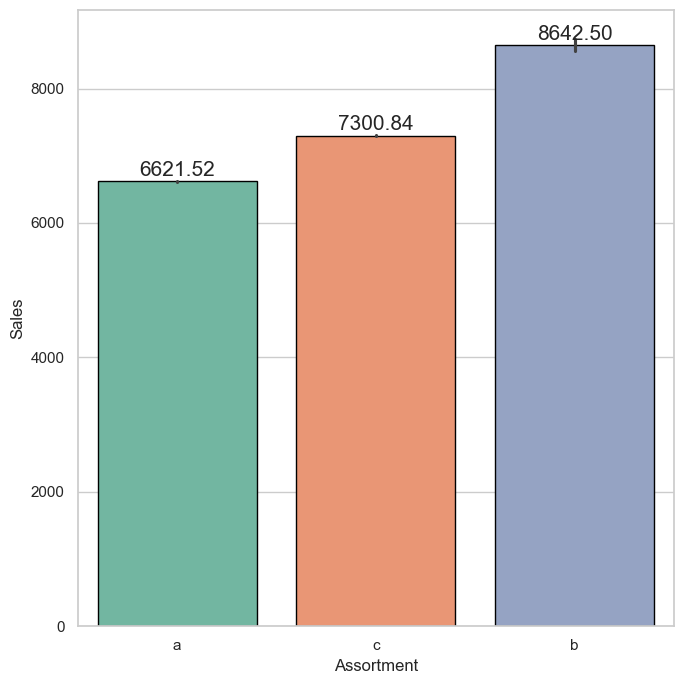

In [ ]:
# Sales vs Assortment
plt.figure(figsize=(7,7))
plots = sns.barplot(x=df['Assortment'],
                    y=df['Sales'],
                    edgecolor='black',
                    palette='Set2')   # 🎨 thêm palette để đổi màu từng cột

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), 
                   ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.tight_layout()
plt.savefig("image/chart9_sales_vs_assortment.png", dpi=200, bbox_inches="tight")  
plt.show()


1. Tại sao bạn chọn biểu đồ này?
Chúng tôi chọn biểu đồ này để xác định doanh số bán hàng của từng loại hàng hóa (Assortment) và tìm ra loại assortment nào mang lại lợi nhuận cao nhất.

2. Những insight (nhận định) rút ra từ biểu đồ là gì?
Trước đó, chúng tôi đã quan sát thấy rằng số lượng cửa hàng thuộc assortment B ít hơn so với assortment A và C.
Tuy nhiên, qua biểu đồ phân tích hai biến (Bivariate graph), ta có thể thấy rằng assortment B lại mang về doanh số cao nhất.

  Doanh số cao nhất thuộc về assortment B.
Điều này có thể là do assortment B có cơ cấu sản phẩm hợp lý, bao gồm các mặt hàng có nhu cầu cao hoặc mang tính độc quyền hơn, giúp tăng doanh thu đáng kể cho cửa hàng.

3. Những insight này có giúp tạo ra tác động tích cực cho doanh nghiệp không?
Có insight nào dẫn đến tăng trưởng âm không? Hãy giải thích cụ thể.

  Có.
Vì assortment B đạt doanh số cao nhất, các chủ cửa hàng Rossmann có thể tập trung phát triển nhiều hơn vào nhóm sản phẩm này, đồng thời giảm sự phụ thuộc vào assortment A và C.
Đây có thể là một chiến lược tối ưu chi phí và mang lại hiệu quả kinh doanh cao hơn cho doanh nghiệp.

## Biểu đồ 10 : Sales vs CompetitionDistance

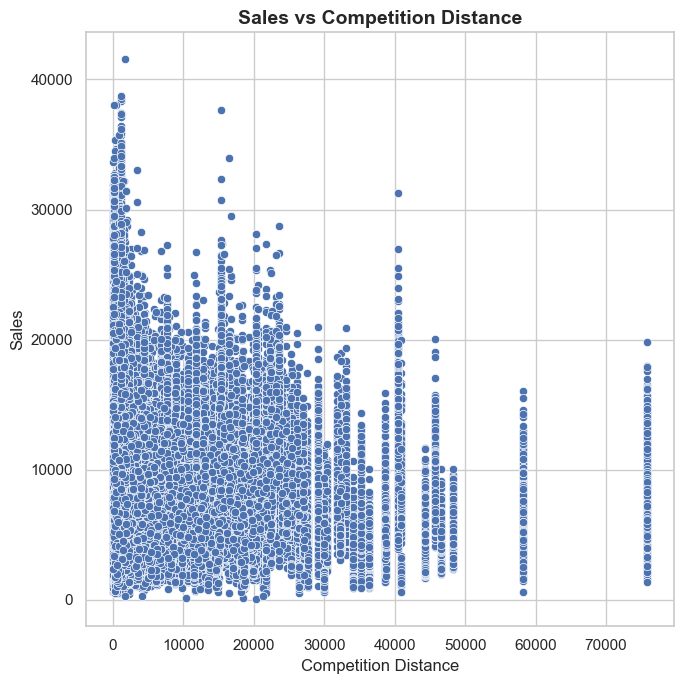

In [14]:
# Sales vs CompetitionDistance
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])
plt.xlabel("Competition Distance")
plt.ylabel("Sales")
plt.title("Sales vs Competition Distance", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("image/chart10_sales_vs_competitiondistance.png", dpi=200, bbox_inches="tight")
plt.show()


1. Tại sao bạn chọn biểu đồ này?

Chúng tôi chọn biểu đồ này để xác định mối quan hệ giữa doanh số bán hàng (Sales) và khoảng cách cạnh tranh (Competition Distance) giữa các cửa hàng.

2. Những insight (nhận định) rút ra từ biểu đồ là gì?

Từ biểu đồ phân tán (scatter plot) trên, có thể quan sát thấy rằng phần lớn các cửa hàng đối thủ không cách quá xa nhau, và những khu vực có mật độ cửa hàng dày đặc thường có doanh số cao hơn.

3. Những insight này có giúp tạo ra tác động tích cực cho doanh nghiệp không?

Có insight nào dẫn đến tăng trưởng âm không? Hãy giải thích cụ thể.

Có.

Do doanh số cao hơn thường xuất hiện ở những khu vực có nhiều cửa hàng gần nhau, nên các cửa hàng có thể tiếp tục triển khai các chương trình ưu đãi và dịch vụ hấp dẫn hơn để thu hút khách hàng và duy trì lợi thế cạnh tranh trên thị trường.

## Biểu đồ 11: Sales vs CompetitionOpenSinceYear

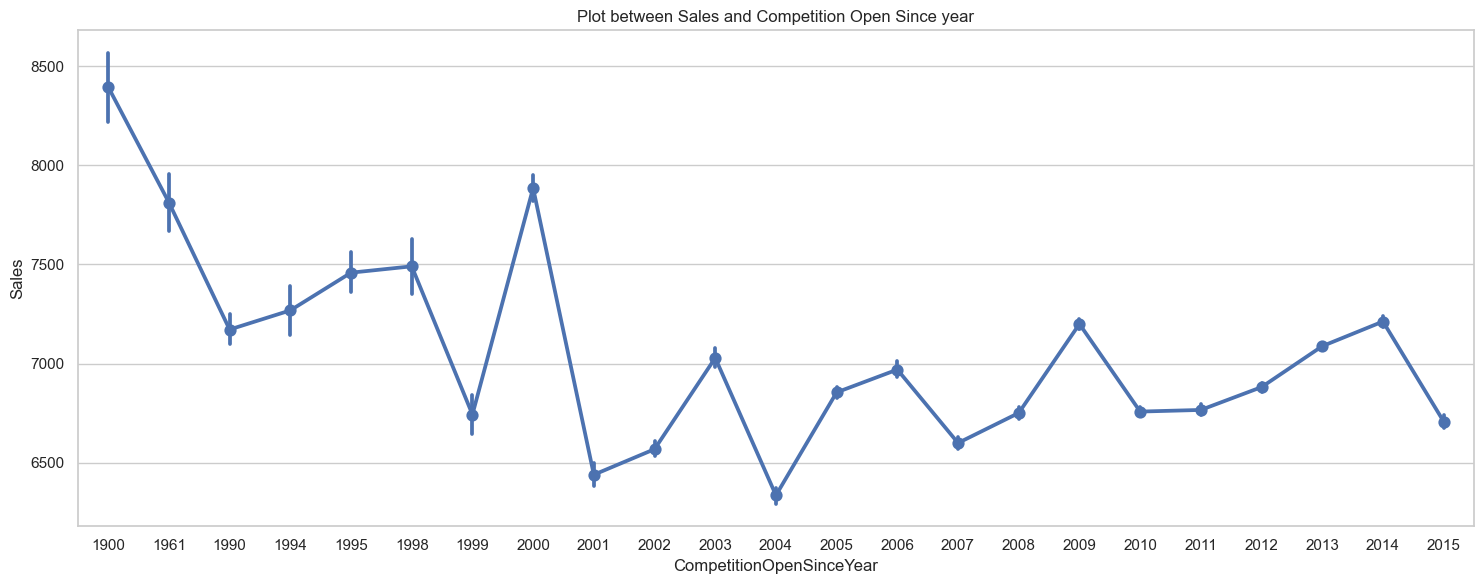

In [16]:
# Sale Vs CompetitionOpenSinceYear
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=df)
plt.title('Plot between Sales and Competition Open Since year')
plt.tight_layout()
plt.savefig("image/chart11_sales_vs_CompetitionOpenSinceYear.png", dpi=200, bbox_inches="tight")

1. Tại sao bạn chọn biểu đồ này?

Chúng tôi chọn biểu đồ này để xác định doanh số trung bình theo từng năm kể từ khi có đối thủ cạnh tranh mở cửa hàng gần đó.

2. Những insight (nhận định) rút ra từ biểu đồ là gì?

Từ biểu đồ, có thể thấy rằng doanh số cao nhất rơi vào năm 1900, thời điểm mà Rossmann chỉ mới có rất ít cửa hàng hoạt động, do đó mức độ cạnh tranh thấp và doanh số cao.
Tuy nhiên, khi số lượng cửa hàng tăng dần qua các năm, mức độ cạnh tranh cũng tăng theo, dẫn đến sự sụt giảm doanh số.

3. Những insight này có giúp tạo ra tác động tích cực cho doanh nghiệp không?

Có insight nào dẫn đến tăng trưởng âm không? Hãy giải thích cụ thể.

Có.

Vì hầu hết các năm sau đó đều ghi nhận sự biến động mạnh (tăng/giảm đột ngột) trong doanh số, các chủ cửa hàng cần tập trung điều chỉnh chiến lược nhập hàng (stocking) và marketing.
Nguyên nhân dẫn đến sự thay đổi đột ngột này cần được phân tích sâu hơn để đưa ra giải pháp hợp lý và bền vững cho hoạt động kinh doanh trong tương lai.

## Biểu đồ 12 : Sales vs Promo2

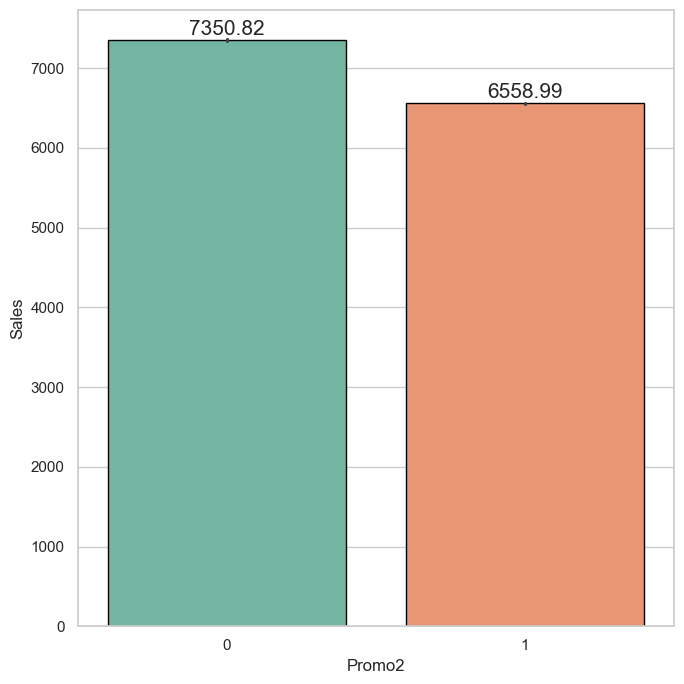

In [ ]:
# Sales vs Promo2

plt.figure(figsize=(7,7))
plots = sns.barplot(x=df['Promo2'],
                    y=df['Sales'],
                    edgecolor='black',
                    palette='Set2')   

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), 
                   ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    

plt.tight_layout()
plt.savefig("image/chart12_sales_vs_promo2.png", dpi=200, bbox_inches="tight")  
plt.show()


1. Tại sao bạn chọn biểu đồ này?

Chúng tôi chọn biểu đồ này để xác định số lượng doanh số bán hàng trong trường hợp có và không có chương trình khuyến mãi liên tiếp (Promo2).

2. Những insight (nhận định) rút ra từ biểu đồ là gì?

Biểu đồ cột cho thấy rằng khách hàng phản ứng kém hơn đối với các cửa hàng đang chạy chương trình khuyến mãi liên tiếp (Promo2).
Một số nguyên nhân có thể bao gồm:

Khách hàng có thể đã tận dụng các chương trình khuyến mãi tương tự trước đó, nên không còn hứng thú tham gia thêm.

Cửa hàng có thể chưa đầu tư đủ vào việc quảng bá cho chương trình khuyến mãi, khiến nhận thức của khách hàng thấp và doanh số giảm.

Ngoài ra, nếu cửa hàng lặp đi lặp lại cùng một loại khuyến mãi, điều này có thể làm giảm sự quan tâm của khách hàng, giảm lượng khách ghé thăm và dẫn đến doanh số thấp hơn.

3. Những insight này có giúp tạo ra tác động tích cực cho doanh nghiệp không?
Có insight nào dẫn đến tăng trưởng âm không? Hãy giải thích cụ thể.


Có.
Những insight này thực sự hữu ích vì chúng chỉ ra một vấn đề quan trọng trong chiến lược khuyến mãi liên tiếp.
Rõ ràng, các chương trình khuyến mãi lặp lại chưa đủ sức thuyết phục để chuyển đổi khách hàng thành người mua hàng thực sự.
Do đó, cửa hàng cần triển khai những chiến dịch khuyến mãi sáng tạo hơn, hấp dẫn hơn và mang lại nhiều giá trị hơn cho khách hàng để tăng hiệu quả kinh doanh.

## Biểu đồ 13: Sales vs Promo2SinceYear

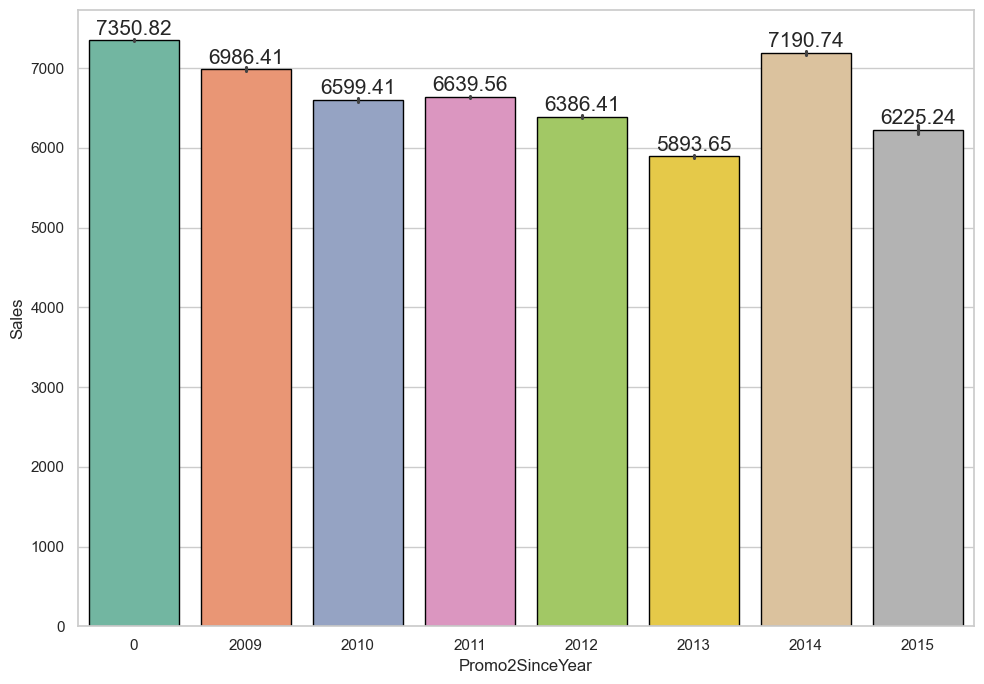

In [20]:
# Sales vs Promo2SinceYear

plt.figure(figsize=(10,7))
plots = sns.barplot(x=df['Promo2SinceYear'],
                    y=df['Sales'],
                    edgecolor='black',
                    palette='Set2')   # 🎨 Thêm palette để mỗi năm có màu khác nhau

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()),
                   ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.tight_layout()
plt.savefig("image/chart13_sales_vs_promo2sinceyear.png", dpi=200, bbox_inches="tight")  # 💾 Lưu ảnh vào thư mục image/
plt.show()


1. Tại sao bạn chọn biểu đồ này?

Chúng tôi chọn biểu đồ này để xác định doanh số bán hàng qua các năm kể từ khi chương trình khuyến mãi liên tiếp (Promo2) được triển khai.

2. Những insight (nhận định) rút ra từ biểu đồ là gì?

Biểu đồ cột cho thấy rằng doanh số vẫn cao nhất khi cửa hàng chưa triển khai chương trình khuyến mãi liên tiếp.
Tuy nhiên, năm 2014 ghi nhận mức tăng doanh số đột biến và đạt vị trí cao thứ hai.
Một số nguyên nhân có thể bao gồm: chất lượng sản phẩm được cải thiện, chính sách ưu đãi hấp dẫn hơn, hoặc sự suy giảm cạnh tranh từ các đối thủ.

3. Những insight này có giúp tạo ra tác động tích cực cho doanh nghiệp không?
Có insight nào dẫn đến tăng trưởng âm không? Hãy giải thích cụ thể.


Có.
Những insight này rất hữu ích, vì chúng chỉ ra một thực tế quan trọng về các chương trình khuyến mãi liên tiếp — rõ ràng, các chương trình khuyến mãi lặp lại chưa đủ để chuyển đổi khách hàng tiềm năng thành người mua hàng thực sự.
Do đó, cửa hàng cần triển khai các chiến dịch khuyến mãi sáng tạo hơn, mang lại nhiều giá trị và phần thưởng hấp dẫn hơn để thu hút và duy trì khách hàng hiệu quả hơn.

## Biểu đồ 14:  Sales vs PromoInterval

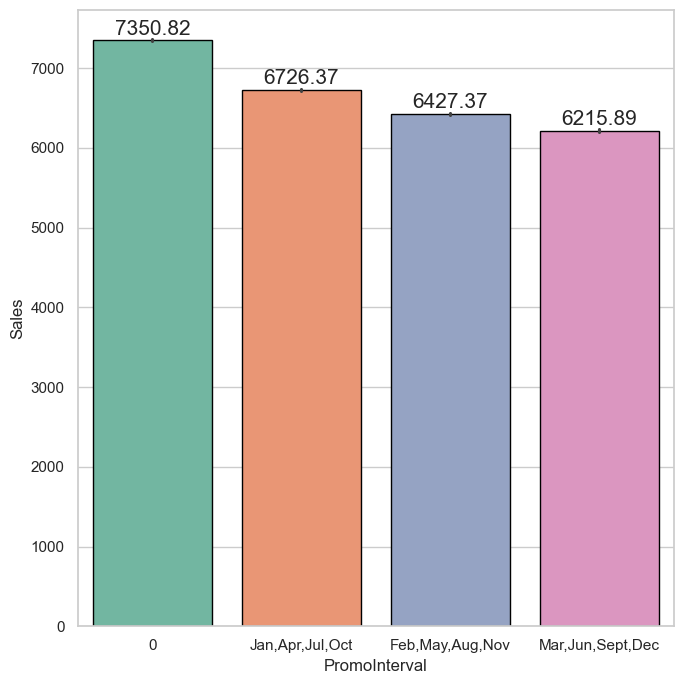

In [22]:
# Sales vs PromoInterval

plt.figure(figsize=(7,7))
plots = sns.barplot(x=df['PromoInterval'],
                    y=df['Sales'],
                    edgecolor='black',
                    palette='Set2')   # 🎨 Thêm palette để mỗi khoảng thời gian có màu khác nhau

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), 
                   ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.tight_layout()
plt.savefig("image/chart14_sales_vs_promointerval.png", dpi=200, bbox_inches="tight")  # 💾 Lưu hình vào thư mục image/
plt.show()


1. Tại sao bạn chọn biểu đồ này?

Chúng tôi chọn biểu đồ này để xác định số lượng doanh số bán hàng tương ứng với các khoảng thời gian khuyến mãi khác nhau (Promo Interval).

2. Những insight (nhận định) rút ra từ biểu đồ là gì?

Biểu đồ cột cho thấy rằng doanh số vẫn cao nhất khi cửa hàng không triển khai các chương trình khuyến mãi liên tiếp.
Bên cạnh đó, khoảng thời gian khuyến mãi vào các tháng 1, 4, 7 và 10 ghi nhận mức doanh số cao thứ hai, vì đây là thời điểm trùng với mùa lễ hội.
Tuy nhiên, các khoảng thời gian khuyến mãi khác lại có doanh số xấp xỉ nhau và thấp hơn so với quý đầu tiên.

3. Những insight này có giúp tạo ra tác động tích cực cho doanh nghiệp không?
Có insight nào dẫn đến tăng trưởng âm không? Hãy giải thích cụ thể.


Có.
Do doanh số có xu hướng giảm dần sau quý đầu tiên của chu kỳ khuyến mãi, doanh nghiệp cần xây dựng lại chiến lược phân bổ và thiết kế chương trình khuyến mãi hợp lý hơn.
Điều này sẽ giúp duy trì sự hứng thú của khách hàng trong suốt năm, tránh tình trạng hiệu quả khuyến mãi giảm dần theo thời gian.

# Phân tích đa biến (Multivariate Analysis)

## Biểu đồ 1: Biểu đồ cặp (Pair Plot)

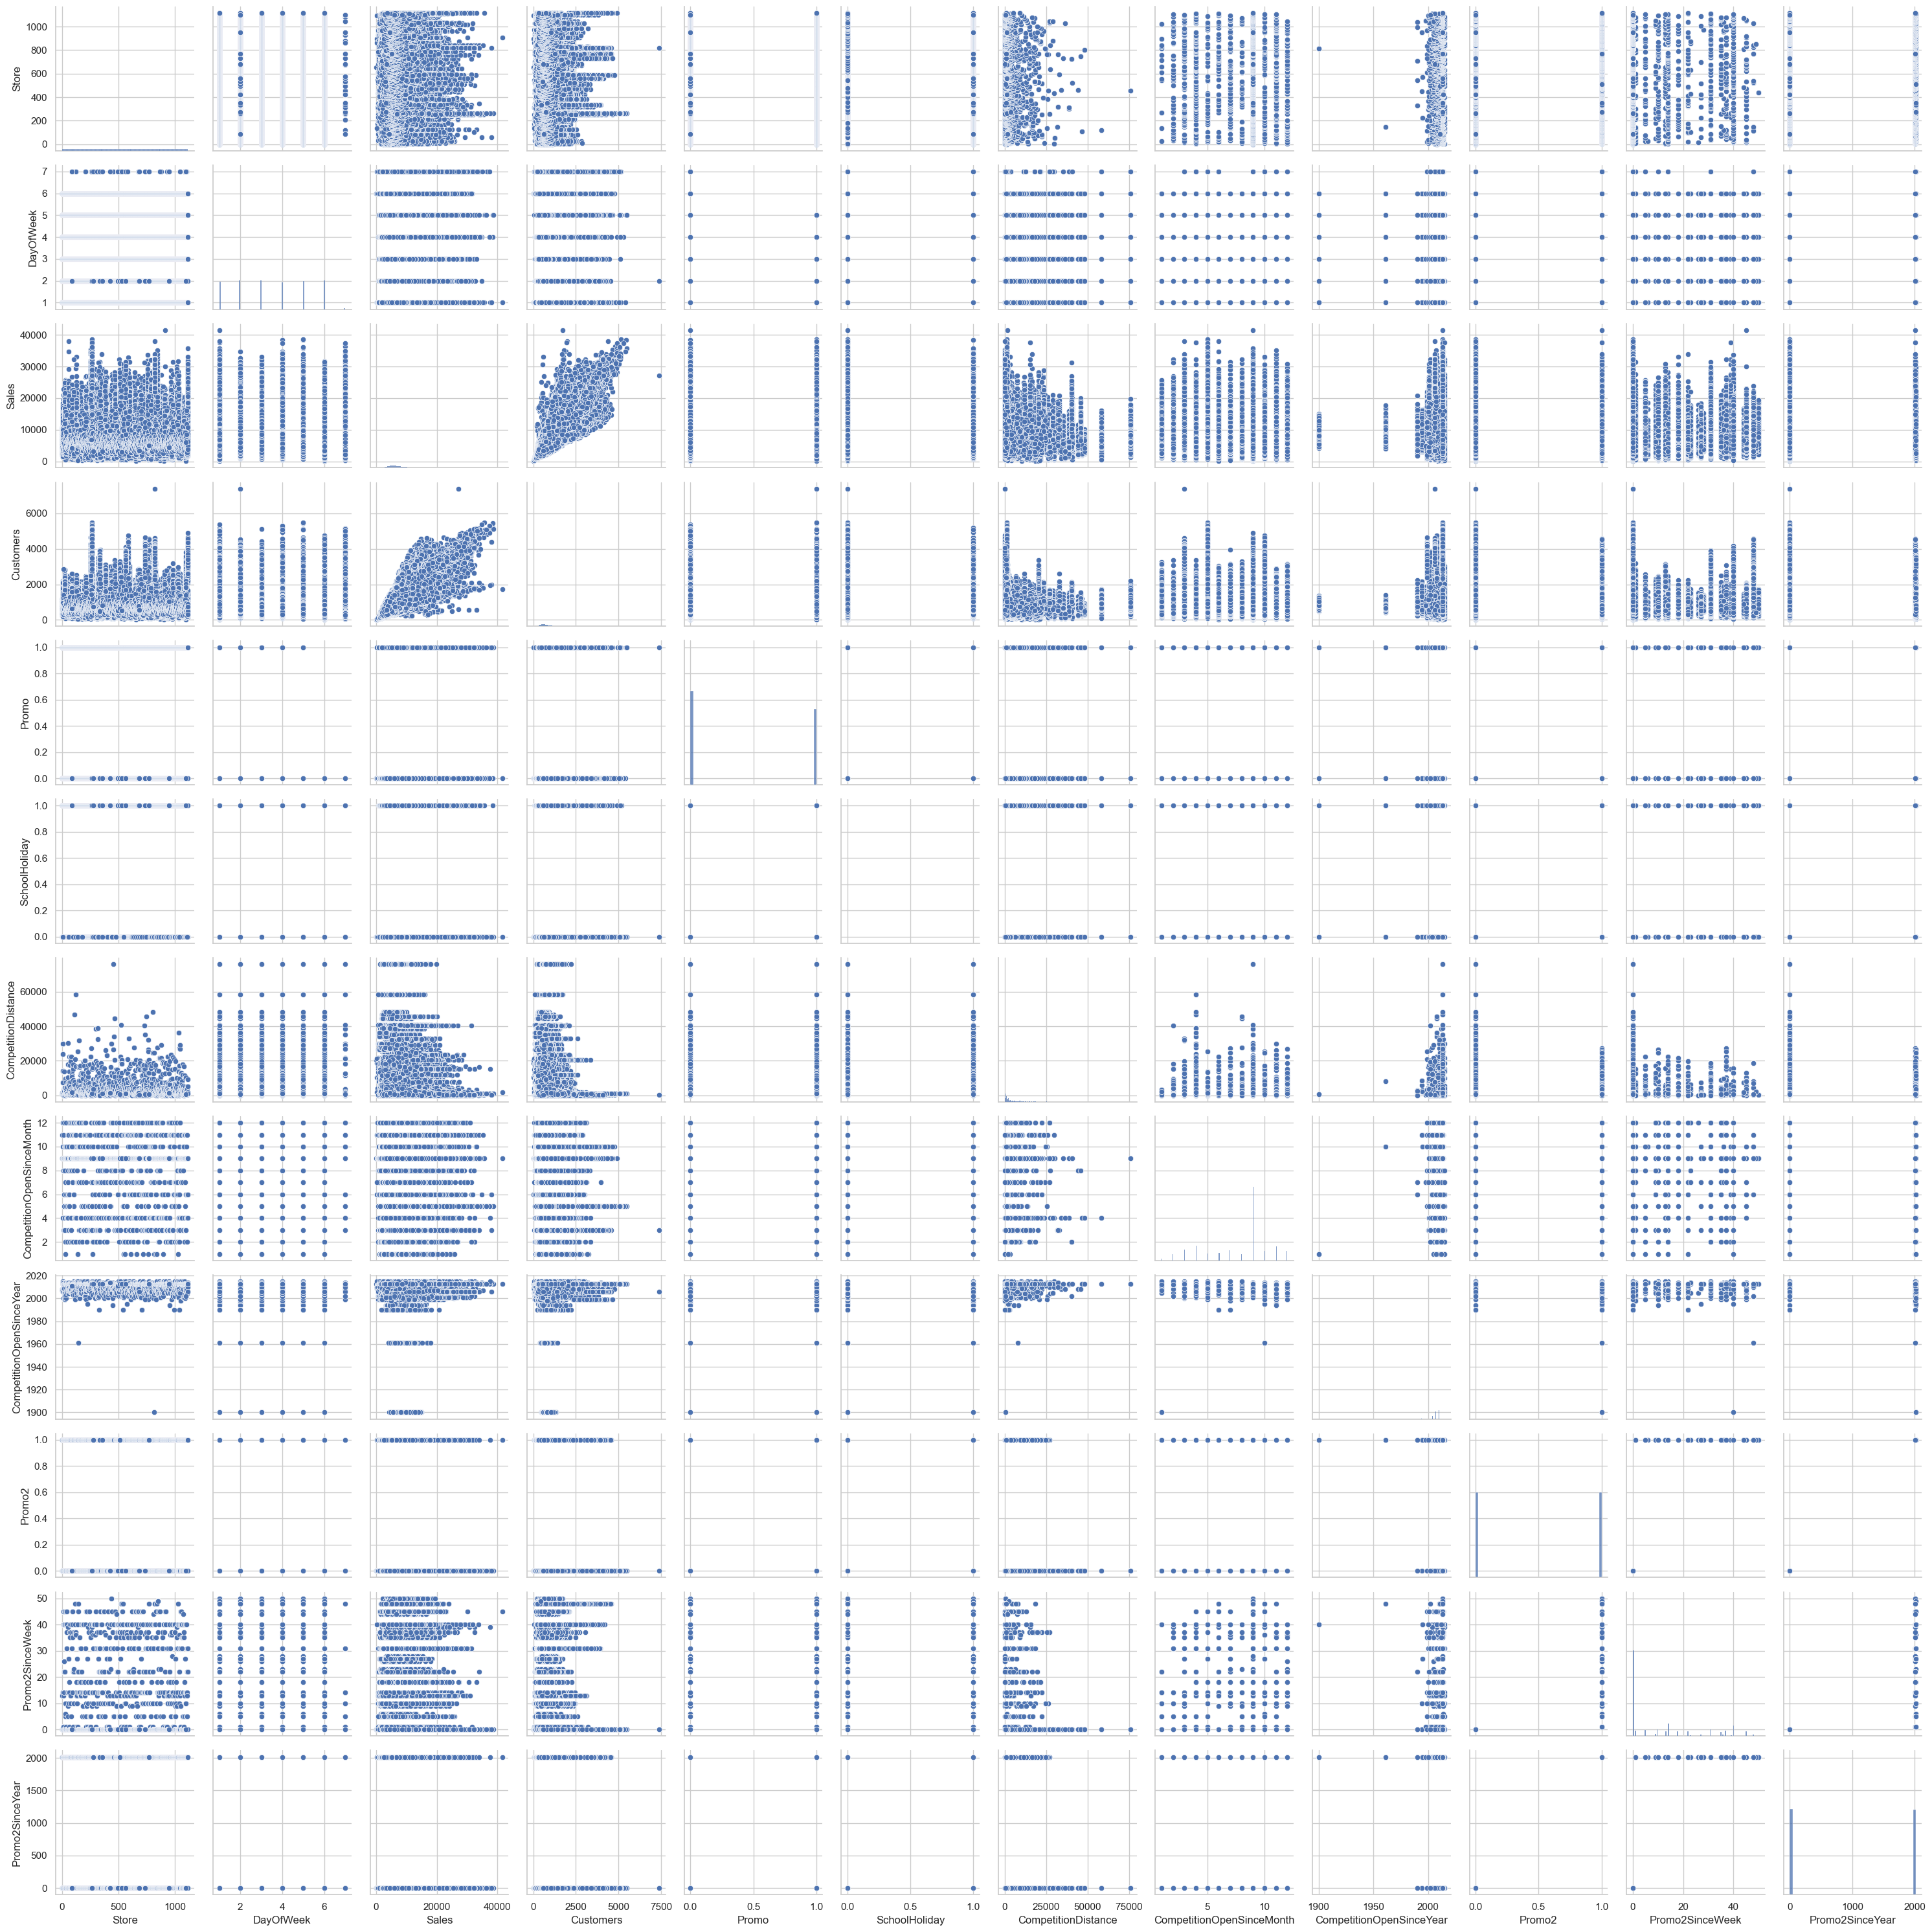

In [24]:
# # Pair Plot visualization code
sns.pairplot(df)
plt.tight_layout()
plt.savefig("image/chart15_bieudocap.png", dpi=200, bbox_inches="tight")  

1. Tại sao bạn chọn biểu đồ này?
Biểu đồ này được chọn vì nó cung cấp nhiều góc nhìn trực quan trong cùng một khung hình, giúp quan sát mối quan hệ giữa nhiều biến cùng lúc và rút ra nhiều insight (nhận định) chỉ trong một lần xem.

2. Những insight (nhận định) rút ra từ biểu đồ là gì?
Biểu đồ cặp (Pair Plot) giúp chúng tôi quan sát mối quan hệ giữa doanh số (Sales) và các biến khác như số lượng khách hàng (Customers), chương trình khuyến mãi (Promo), mức độ cạnh tranh (CompetitionDistance) và ngày nghỉ học (SchoolHoliday).
Qua đó, chúng tôi có thể xác định được những biến nào có ảnh hưởng đáng kể đến doanh số, từ đó định hướng cho việc thiết kế mô hình học máy (Machine Learning Model) trong các bước phân tích sau.

3. Những insight này có giúp tạo ra tác động tích cực cho doanh nghiệp không?
Có insight nào dẫn đến tăng trưởng âm không? Hãy giải thích cụ thể.

Có.
Nhờ việc trực quan hóa bằng pairplot, chúng tôi nhận biết được những yếu tố tác động mạnh nhất đến doanh số, giúp doanh nghiệp tập trung vào các yếu tố quan trọng nhất để tối ưu doanh thu và chiến lược kinh doanh.

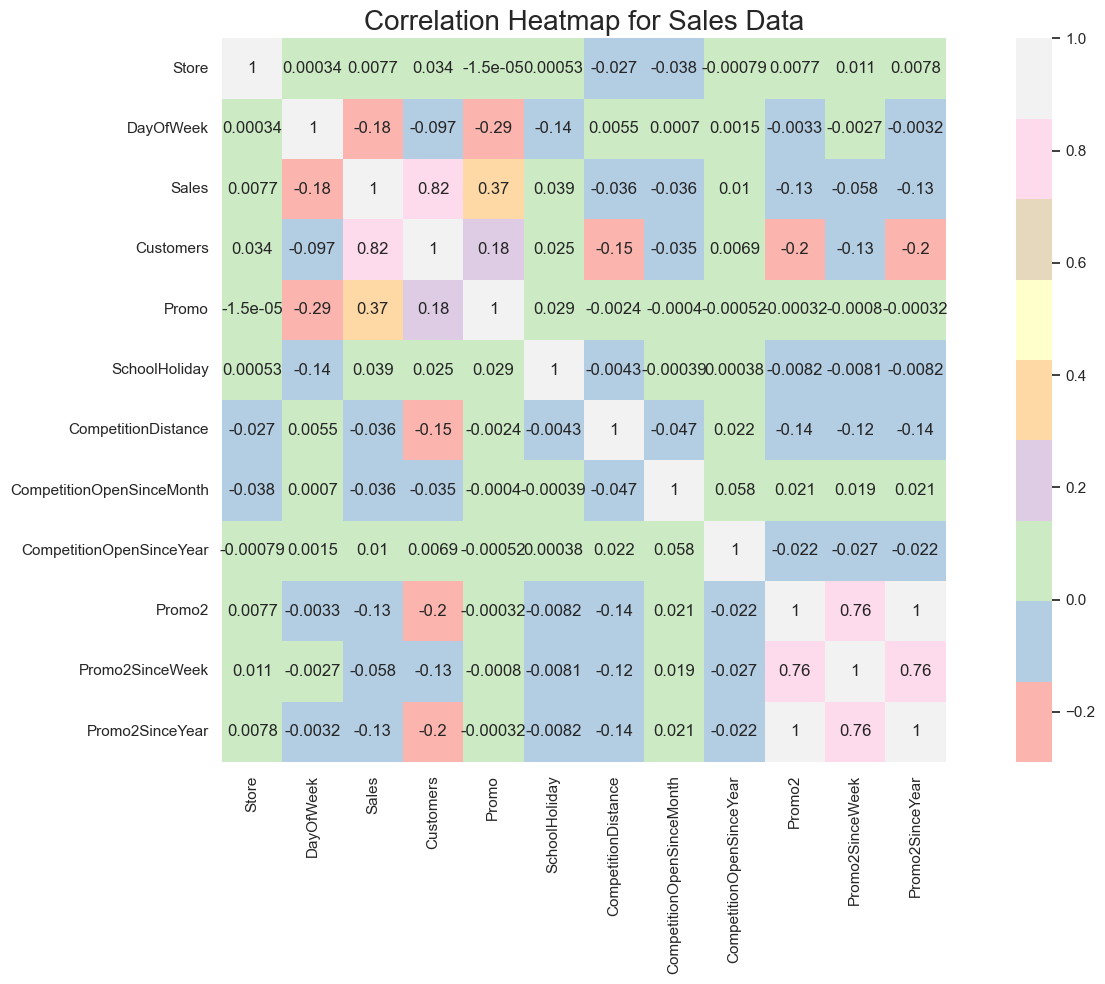

In [26]:
# Sales Heatmap (Multivariate Analysis)
plt.figure(figsize=(15,10))

# 🔹 Lọc chỉ các cột dạng số để tránh lỗi
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 🔹 Vẽ heatmap
sns.heatmap(numeric_df.corr(),
            annot=True,
            cmap=sns.color_palette('Pastel1'),
            square=True)

plt.title('Correlation Heatmap for Sales Data', size=20)
plt.tight_layout()
plt.savefig("image/heatmap.png", dpi=200, bbox_inches="tight")
plt.show()


In [ ]:
# Phân tích đa biến (Multivariate Analysis)